### Identifying cellular compartments / tissue zones using matrix factorisation (NMF)

Here, we use the cell2location mapping results to identify the spatial co-occurrence of cell types in order to better understand the tissue organisation and predict cellular interactions. We performed non-negative matrix factorization (NMF) of the cell type abundance estimates from cell2location (paper section 4, Fig 4D). Similar to the established benefits of applying NMF to conventional scRNA-seq, the additive NMF decomposition yielded a grouping of spatial cell type abundance profiles into components that capture co-localised cell types (Supplemenary Methods section 4.2, p. 60). This NMF-based decomposition naturally accounts for the fact that multiple cell types and microenvironments can co-exist at the same Visium locations (see paper Fig S20, p. 34), while sharing information across tissue areas (e.g. individual germinal centres).

**Tip**

In practice, it is better to train NMF for a range of factors R=5,..,30 and select R as a balance between capturing fine-grained and splitting known well-established tissue zones.

If you want to find a few most disctinct cellular compartments, use a small number of factors. If you want to find very strong co-location signal and assume that most cell types don’t co-locate, use a lot of factors (> 30 - used here).

In [1]:
import scanpy as sc
import squidpy as sq
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
from matplotlib_scalebar.scalebar import ScaleBar
import os

import cell2location
import scvi

DPI = 300
FONTSIZE = 20  # 42
sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

import seaborn as sns
from pathlib import Path

custom_params = {"font.size": FONTSIZE, "figure.dpi": 100, "savefig.dpi": DPI}
sns.set_theme(style="ticks", rc=custom_params)

Global seed set to 0


In [2]:
SAMPLE_NAME = "CRC09_LM_VISIUM"

In [3]:
# DIR2SAVE
DIR2SAVE = Path(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2location/{SAMPLE_NAME}"
)
DIR2SAVE.mkdir(parents=True, exist_ok=True)

In [4]:
run_name = DIR2SAVE.joinpath(f"cell2location_map-no_cycling_TME/")
run_name.mkdir(parents=True, exist_ok=True)

In [5]:
adata_file = f"{run_name}/sp.h5ad"
adata_vis = sc.read_h5ad(adata_file)
mod = cell2location.models.Cell2location.load(f"{run_name}", adata_vis)

INFO     File /data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/
         cell2location/CRC09_LM_VISIUM/cell2location_map-no_cycling_TME/model.pt already     
         downloaded                                                                          
INFO     Preparing underlying module for load                                                


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 1/30000:   0%|          | 1/30000 [00:00<4:32:48,  1.83it/s, v_num=1, elbo_train=2.15e+7]


In [6]:
from cell2location import run_colocation

res_dict, adata_vis = run_colocation(
    adata_vis,
    model_name="CoLocatedGroupsSklearnNMF",
    train_args={
        "n_fact": np.arange(
            5, 11
        ),  # IMPORTANT: use a wider range of the number of factors (5-30)
        "sample_name_col": "Sample",  # columns in adata_vis.obs that identifies sample
        "n_restarts": 5,  # number of training restarts # previously 3
    },
    export_args={"path": f"{run_name}/CoLocatedComb/"},
)

### Analysis name: CoLocatedGroupsSklearnNMF_5combinations_937locations_55factors


/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrin

### Analysis name: CoLocatedGroupsSklearnNMF_6combinations_937locations_55factors


/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrin

### Analysis name: CoLocatedGroupsSklearnNMF_7combinations_937locations_55factors


/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrin

### Analysis name: CoLocatedGroupsSklearnNMF_8combinations_937locations_55factors


/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrin

### Analysis name: CoLocatedGroupsSklearnNMF_9combinations_937locations_55factors


/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrin

### Analysis name: CoLocatedGroupsSklearnNMF_10combinations_937locations_55factors


/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/data/BCI-CRC/nasrin

In [7]:
run_name

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2location/CRC09_LM_VISIUM/cell2location_map-no_cycling_TME')

#### Explanation of the model
factorise cell type density using Negative Matrix Factorisation

uses the estimated cell type abundance inferred by cell2location and decompose it to identify set of cell types that co-localise 

`If you want to find the most disctinct cell type combinations, use a small number of factors.`

`If you want to find very strong co-location signal and assume that most cell types are on their own, use a lot of factors (> 30).`

model density across locations 

In [8]:
adata_file2 = f"{run_name}/sp_with_NMF.h5ad"
adata_vis.write(adata_file2)

The NMF model output such as factor loadings are stored in adata.uns[f"mod_coloc_n_fact{n_fact}"] in a similar output format as main cell2location results in adata.uns['mod'].

**show a dot plot of the estimated NMF weights of cell types (rows) across NMF components (columns)** which correspond to cellular compartments. Shown are relative weights, normalized across components for every cell type.

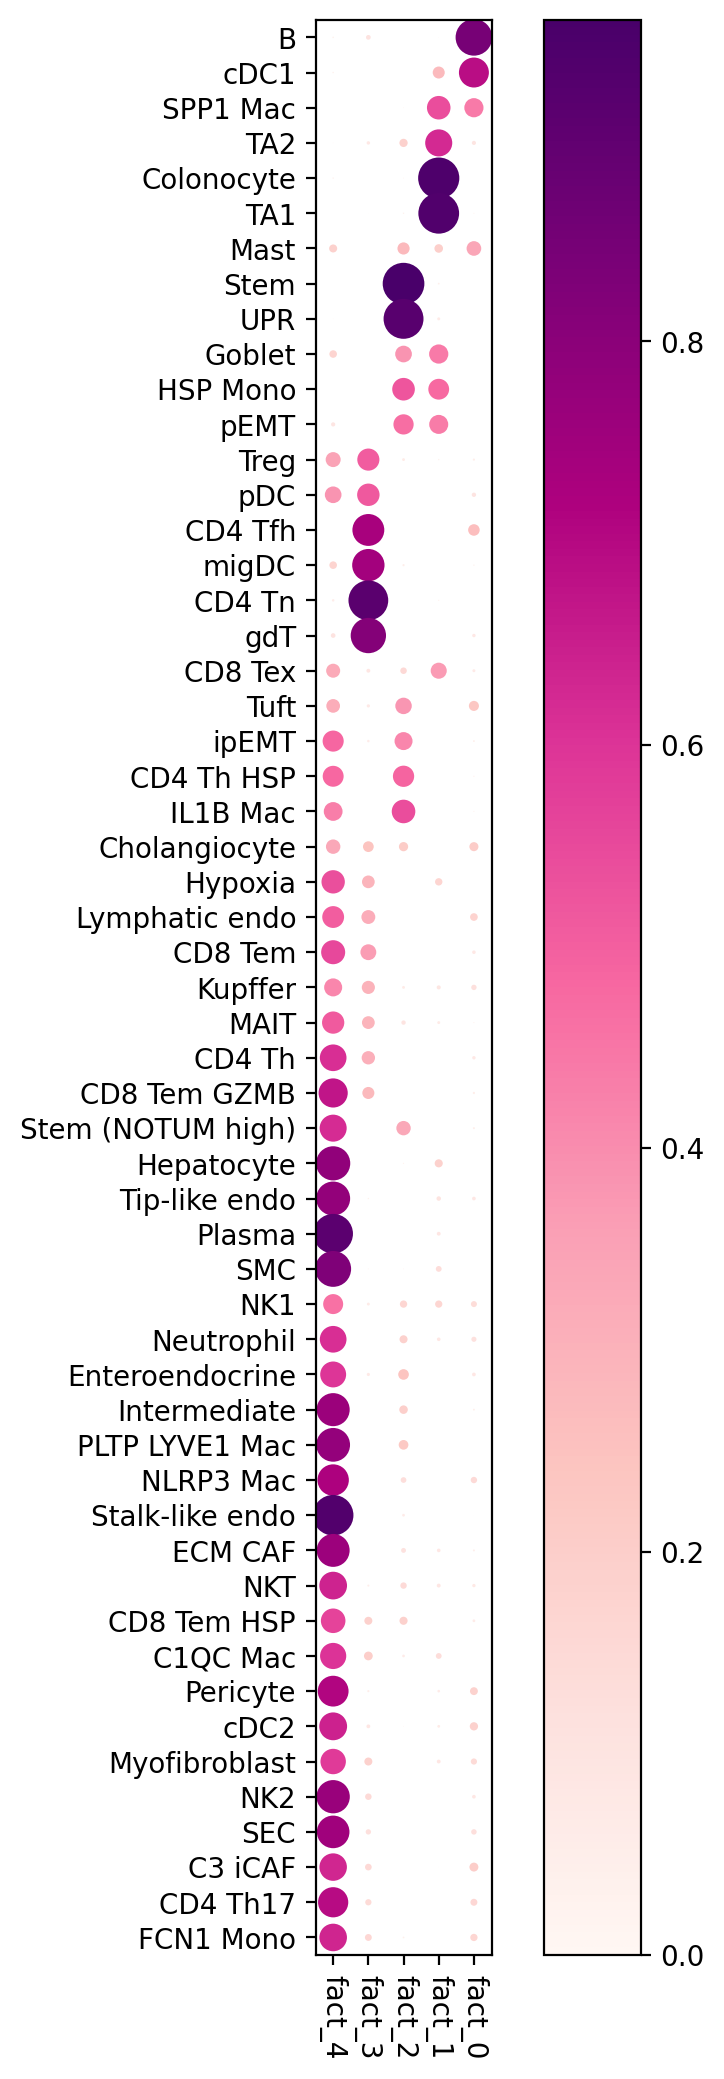

In [9]:
# Here we plot the NMF weights (Same as saved to `cell_type_fractions_heatmap`)
res_dict["n_fact5"]["mod"].plot_cell_type_loadings()

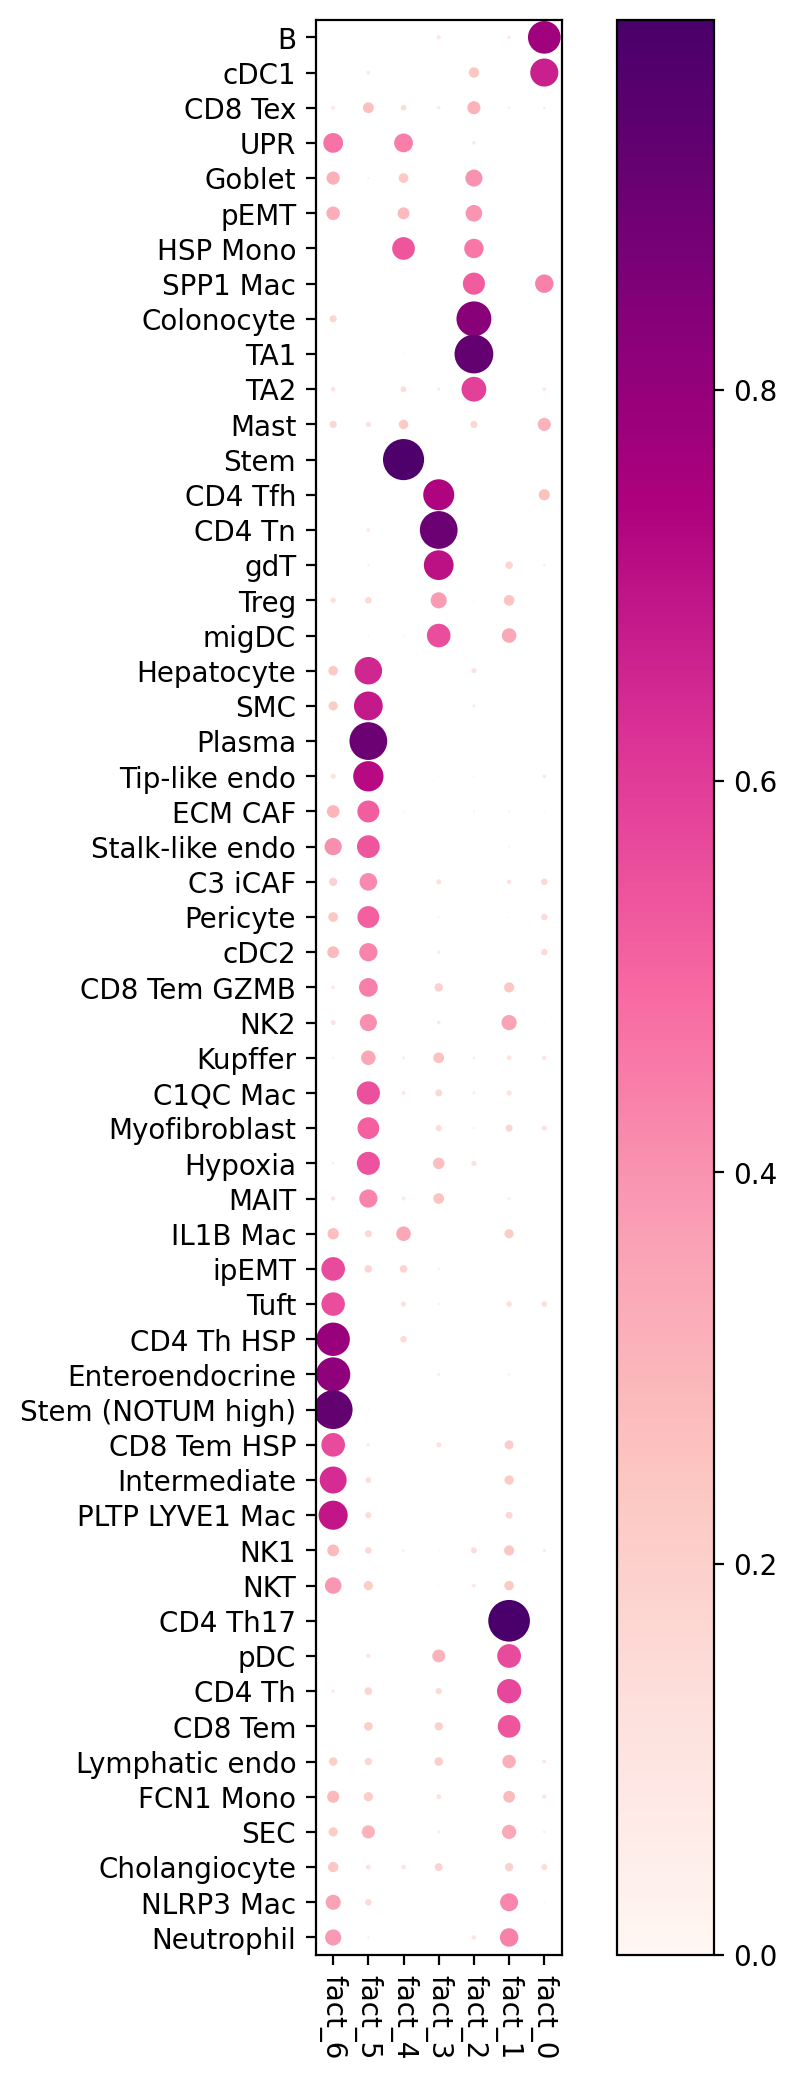

In [10]:
# Here we plot the NMF weights (Same as saved to `cell_type_fractions_heatmap`)
res_dict["n_fact7"]["mod"].plot_cell_type_loadings()

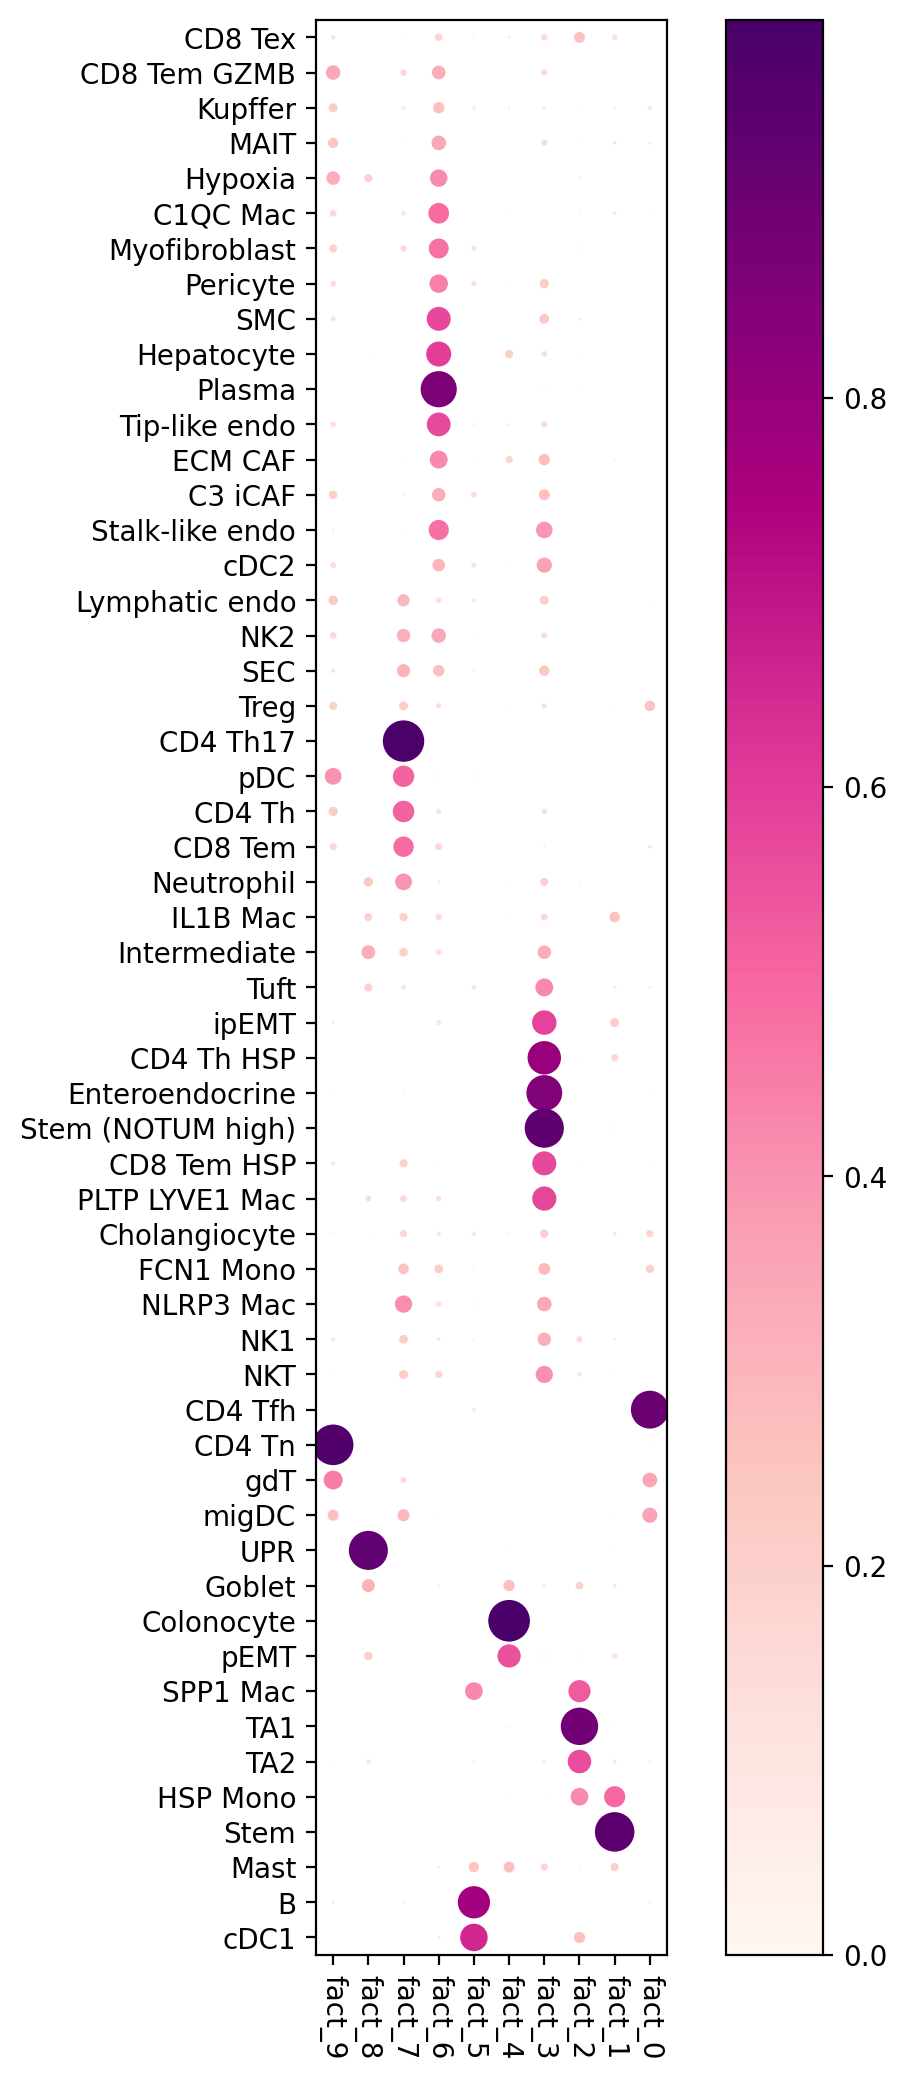

In [11]:
# Here we plot the NMF weights (Same as saved to `cell_type_fractions_heatmap`)
res_dict["n_fact10"]["mod"].plot_cell_type_loadings()

In [12]:
# Here we plot the NMF weights (Same as saved to `cell_type_fractions_heatmap`)
res_dict["n_fact15"]["mod"].plot_cell_type_loadings()

KeyError: 'n_fact15'